## **데이터셋 정보**
| **컬럼명**      | **설명** |
|:---|:---|
| **country**     | 국가 이름 |
| **child_mort**  | 1000명당 5세 미만 아동 사망률(유아 사망률) |
| **exports**     | 상품 및 서비스 수출. 총 GDP 대비 백분율로 표시됨(수출 비율)  |
| **health**      | 총 건강 지출. 총 GDP 대비 백분율로 표시됨(건강 관련 지출 비율) |
| **imports**     | 상품 및 서비스 수입. 총 GDP 대비 백분율로 표시됨(수입 비율)  |
| **income**      | 개인 당 순소득(1인당 소득) |
| **inflation**   | 총 GDP의 연간 성장률 측정(인플레이션(물가 상승율) 비율) |
| **life_expec**  | 현재 사망률 패턴이 지속된다고 할 때, 신생아의 평균 수명(기대수명) |
| **total_fer**   | 현재의 연령별 출산율이 유지된다고 할 때, 각 여성당 출산될 아이의 수(합계 출산율)|
| **gdpp**        | 1인당 GDP. 총 GDP를 총 인구로 나눈 값(1인당 GDP) |
| **region_1**    | 지역 구분 1  |
| **region_2**    | 지역 구분 2 |
| **continent**   | 대륙 |

In [1]:
from sklearn.preprocessing import StandardScaler
from matplotlib import font_manager, rc
from matplotlib import pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd
import numpy as np

plt.rc("font", family = "Malgun Gothic")

In [2]:
df = pd.read_csv("./data/countries.csv", encoding="utf-8", index_col="country")

## **데이터 기본 EDA**

In [3]:
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,region_1,region_2,continent,latitude,longitude
country,,,,,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,Southern Asia,NaN,Asia,33.939110,67.709953
Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,Southern Europe,NaN,Europe,41.153332,20.168331
Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,Northern Africa,NaN,Africa,28.033886,1.659626
Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,Middle Africa,Sub-Saharan Africa,Africa,-11.202692,17.873887
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,Caribbean,Latin America and the Caribbean,North America,17.060816,-61.796428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950.0,2.62,63.0,3.50,2970.0,Melanesia,NaN,Oceania,-15.376706,166.959158
Venezuela,17.1,28.5,4.91,17.6,16500.0,45.90,75.4,2.47,13500.0,South America,Latin America and the Caribbean,South America,6.423750,-66.589730
Vietnam,23.3,72.0,6.84,80.2,4490.0,12.10,73.1,1.95,1310.0,South-eastern Asia,NaN,Asia,14.058324,108.277199


In [4]:
df["continent"].value_counts()

Africa           47
Asia             45
Europe           39
North America    15
South America    12
Oceania           9
Name: continent, dtype: int64

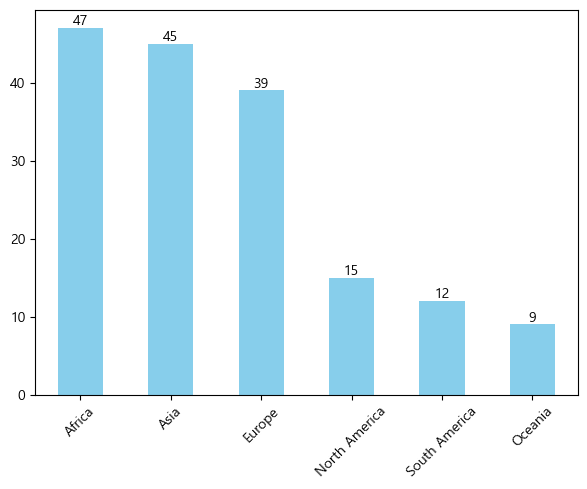

In [5]:
continent_df = df["continent"].value_counts()
ax = continent_df.plot(kind="bar", figsize=(7,5), color="skyblue")

for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha="center", va="bottom")

plt.xticks(rotation=45)
plt.show()

In [6]:
df["region_1"].value_counts()

Western Africa               16
Western Asia                 16
Eastern Africa               13
South America                12
Southern Europe              12
South-eastern Asia           11
Eastern Europe               10
Northern Europe              10
Southern Asia                 9
Caribbean                     8
Middle Africa                 8
Western Europe                7
Northern Africa               6
Central America               5
Central Asia                  5
Southern Africa               4
Eastern Asia                  4
Melanesia                     3
Australia and New Zealand     2
Northern America              2
Micronesia                    2
Polynesia                     2
Name: region_1, dtype: int64

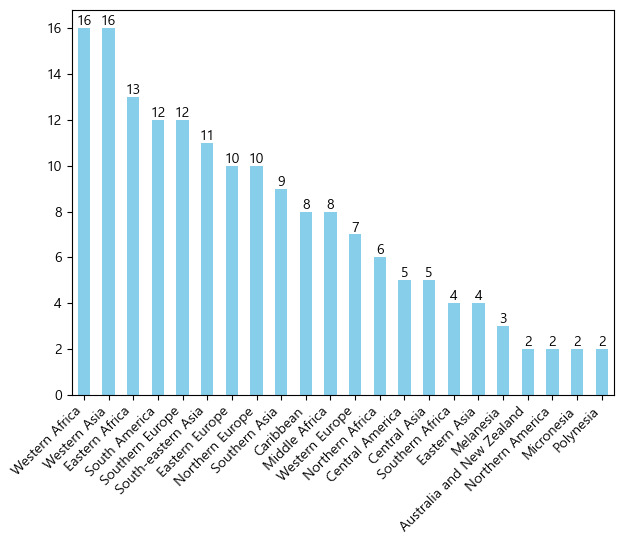

In [7]:
region_1_df = df["region_1"].value_counts()
ax = region_1_df.plot(kind="bar", figsize=(7,5), color="skyblue")

for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha="center", va="bottom")

plt.xticks(rotation=45, ha="right")
plt.show()

In [8]:
df[["continent", "region_1"]].value_counts()

continent      region_1                 
Africa         Western Africa               16
Asia           Western Asia                 16
Africa         Eastern Africa               13
Europe         Southern Europe              12
South America  South America                12
Asia           South-eastern Asia           11
Europe         Northern Europe              10
               Eastern Europe               10
Asia           Southern Asia                 9
Africa         Middle Africa                 8
North America  Caribbean                     8
Europe         Western Europe                7
Africa         Northern Africa               6
North America  Central America               5
Asia           Central Asia                  5
               Eastern Asia                  4
Africa         Southern Africa               4
Oceania        Melanesia                     3
North America  Northern America              2
Oceania        Australia and New Zealand     2
               Micr

C:\Users\ysh10\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<AxesSubplot: >

C:\Users\ysh10\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\ysh10\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


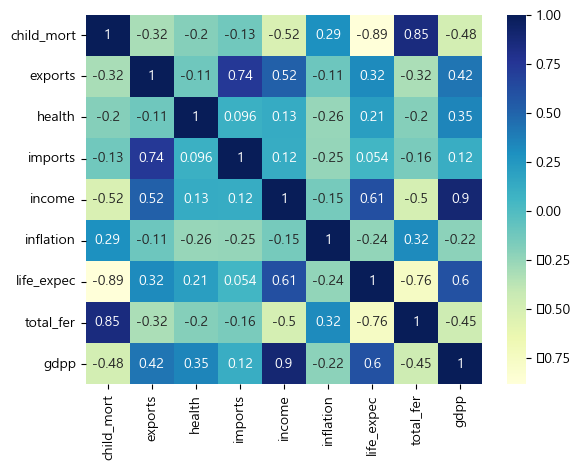

In [9]:
numeric_df = df.drop(["region_1", "region_2", "continent", "latitude", "longitude"], axis=1)

sns.heatmap(
    numeric_df.corr(), 
    annot=True, 
    cmap="YlGnBu")

## **건강&복지적 기본 EDA**

In [10]:
filtered_df = df[["child_mort", "health", "life_expec", "region_1", "region_2", "continent"]]

In [11]:
filtered_df.reset_index(inplace=True)

In [12]:
filtered_df.describe()

,child_mort,health,life_expec
count,167.000000,167.000000,167.000000
mean,38.270060,6.815689,70.555689
std,40.328931,2.746837,8.893172
min,2.600000,1.810000,32.100000
25%,8.250000,4.920000,65.300000
50%,19.300000,6.320000,73.100000
75%,62.100000,8.600000,76.800000
max,208.000000,17.900000,82.800000


C:\Users\ysh10\AppData\Local\Temp\ipykernel_1556\2106875410.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  filtered_df.corr(),
C:\Users\ysh10\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<AxesSubplot: >

C:\Users\ysh10\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\ysh10\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


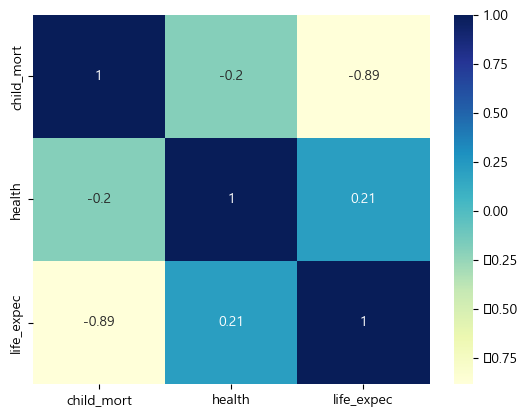

In [13]:
sns.heatmap(
    filtered_df.corr(), 
    annot=True, 
    cmap="YlGnBu")

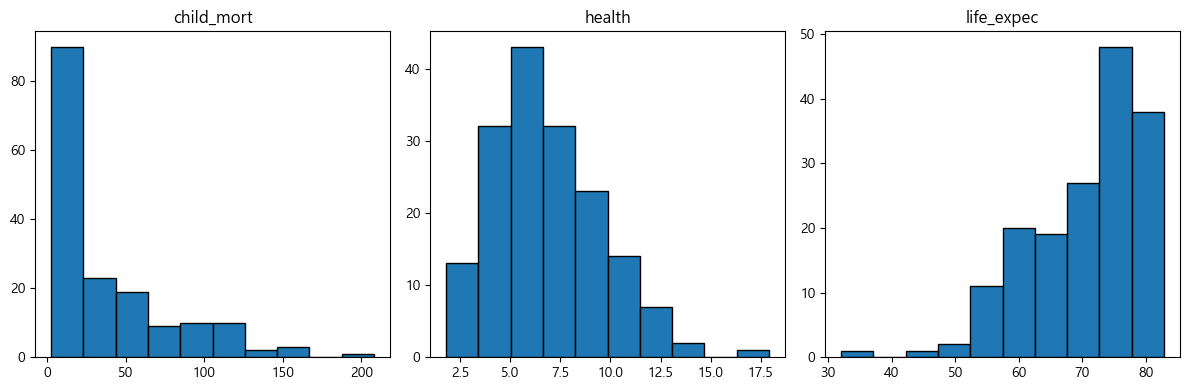

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

for i, column in enumerate(filtered_df[["child_mort", "health", "life_expec"]]):
    axs[i].hist(filtered_df[column], bins=10, edgecolor="black")
    axs[i].set_title(f"{column}")

plt.tight_layout()
plt.show()

## **건강&복지적 데이터 전처리**

In [15]:
filtered_df[["pre_child_mort", "pre_health", "pre_life_expec"]] = np.log(filtered_df[["child_mort", "health", "life_expec"]])

C:\Users\ysh10\AppData\Local\Temp\ipykernel_1556\4178577110.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[["pre_child_mort", "pre_health", "pre_life_expec"]] = np.log(filtered_df[["child_mort", "health", "life_expec"]])
C:\Users\ysh10\AppData\Local\Temp\ipykernel_1556\4178577110.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[["pre_child_mort", "pre_health", "pre_life_expec"]] = np.log(filtered_df[["child_mort", "health", "life_expec"]])
C:\Users\ysh10\AppData\Local\Temp\ip

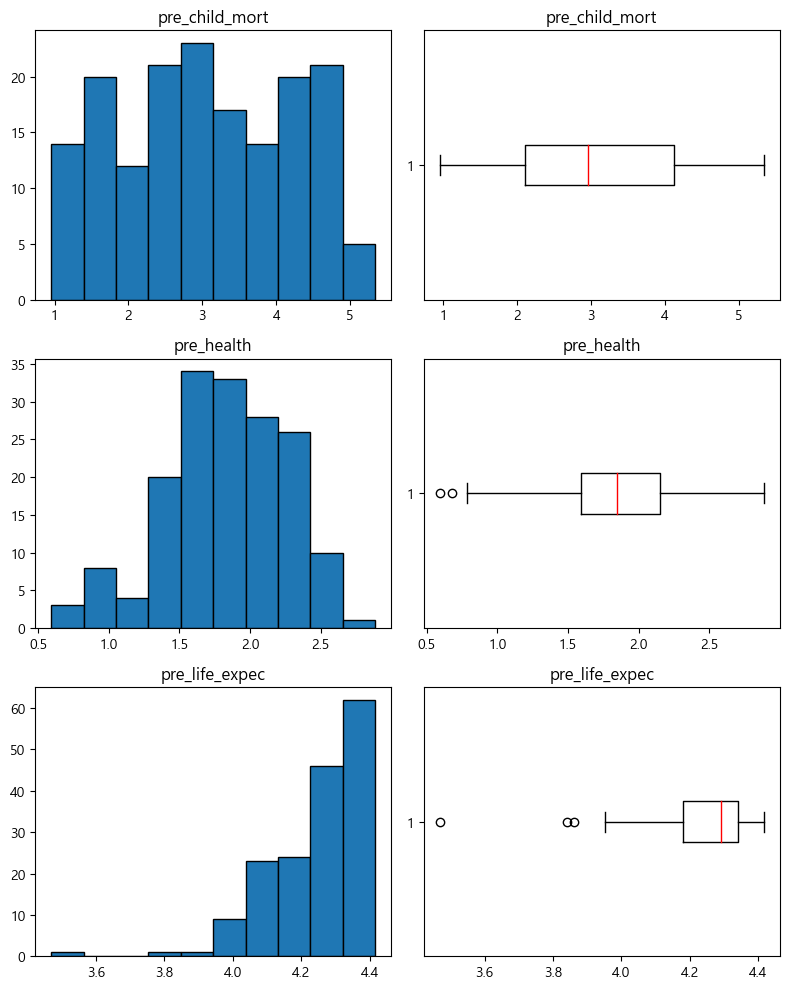

In [16]:
fig, axs = plt.subplots(3, 2, figsize=(8, 10))

for i, column in enumerate(filtered_df[["pre_child_mort", "pre_health", "pre_life_expec"]]):
    # 히스토그램을 첫 번째 열에 배치
    axs[i, 0].hist(filtered_df[column], bins=10, edgecolor="black")
    axs[i, 0].set_title(f"{column}")
    
    # 박스플롯을 두 번째 열에 배치
    axs[i, 1].boxplot(filtered_df[column], vert=False,
                       boxprops=dict(color="black"), 
                       whiskerprops=dict(color="black"),
                       medianprops=dict(color="red"))
    axs[i, 1].set_title(f"{column}")

plt.tight_layout()
plt.show()

## **건강&복지적 계층적 군집 분석**

In [17]:
from scipy.cluster import hierarchy as hc

In [18]:
sampled_df = filtered_df[["pre_child_mort", "pre_health", "pre_life_expec"]].sample(30)

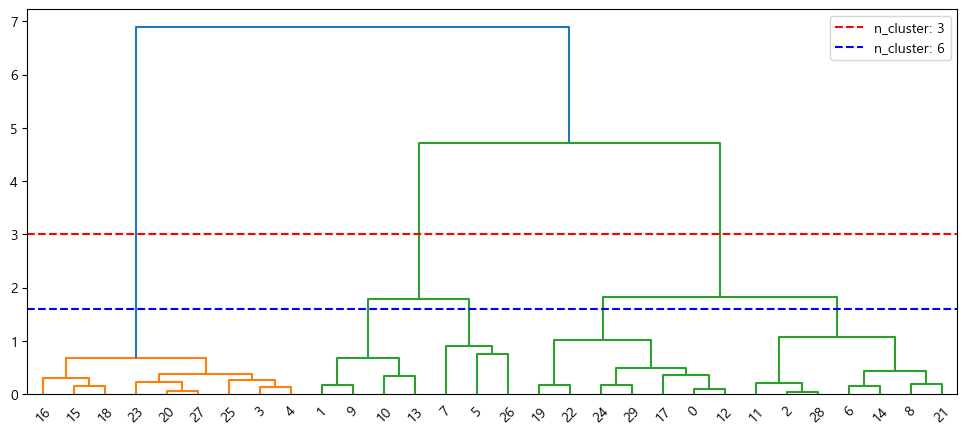

In [19]:
plt.figure(figsize=(12, 5))
_= hc.dendrogram(
    hc.linkage(sampled_df, method="ward")
)
plt.axhline(3.0, color="red", linestyle="--", label="n_cluster: 3")
plt.axhline(1.6, color="blue", linestyle="--", label="n_cluster: 6")
plt.legend()

### **실루엣 계수를 이용해서 클러스터 개수 결정**

In [20]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from tqdm.notebook import tqdm

In [21]:
silhouette_scores = []
for i in tqdm(range(2, 8)):
    silhouette_scores.append( 
        silhouette_score(filtered_df[["pre_child_mort", "pre_health", "pre_life_expec"]], AgglomerativeClustering(n_clusters=i).fit_predict(filtered_df[["child_mort", "health", "life_expec"]]))                                                                               
    )

  0%|          | 0/6 [00:00<?, ?it/s]

In [22]:
silhouette_scores

[0.3860440141748508,
 0.3587429038471798,
 0.29129088459268343,
 0.28899322230125507,
 0.22824507198234206,
 0.24753338123832622]

<BarContainer object of 6 artists>

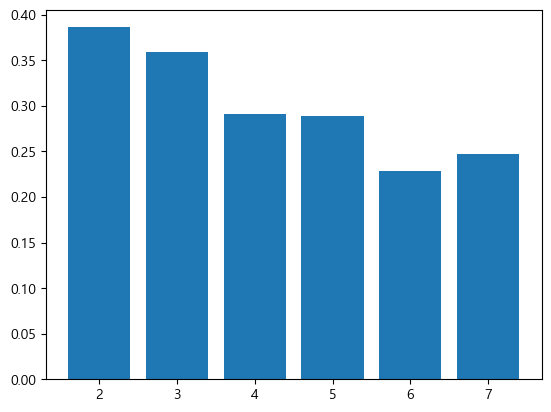

In [23]:
plt.bar(range(2, 8), silhouette_scores)

### **계층적 군집 모델 학습**

In [24]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=3, metric="euclidean", linkage="ward") 
filtered_df["label"] = model.fit_predict(filtered_df[["pre_child_mort", "pre_health", "pre_life_expec"]]) 

C:\Users\ysh10\AppData\Local\Temp\ipykernel_1556\1322499455.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["label"] = model.fit_predict(filtered_df[["pre_child_mort", "pre_health", "pre_life_expec"]])


In [25]:
filtered_df

,country,child_mort,health,life_expec,region_1,region_2,continent,pre_child_mort,pre_health,pre_life_expec,label
0,Afghanistan,90.2,7.58,56.2,Southern Asia,NaN,Asia,4.502029,2.025513,4.028917,1
1,Albania,16.6,6.55,76.3,Southern Europe,NaN,Europe,2.809403,1.879465,4.334673,0
2,Algeria,27.3,4.17,76.5,Northern Africa,NaN,Africa,3.306887,1.427916,4.337291,0
3,Angola,119.0,2.85,60.1,Middle Africa,Sub-Saharan Africa,Africa,4.779123,1.047319,4.096010,1
4,Antigua and Barbuda,10.3,6.03,76.8,Caribbean,Latin America and the Caribbean,North America,2.332144,1.796747,4.341205,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,5.25,63.0,Melanesia,NaN,Oceania,3.374169,1.658228,4.143135,0
163,Venezuela,17.1,4.91,75.4,South America,Latin America and the Caribbean,South America,2.839078,1.591274,4.322807,0
164,Vietnam,23.3,6.84,73.1,South-eastern Asia,NaN,Asia,3.148453,1.922788,4.291828,0
165,Yemen,56.3,5.18,67.5,Western Asia,NaN,Asia,4.030695,1.644805,4.212128,1


## **건강&복지적 군집 EDA**
* child_mort - 유아 사망률 / health - 건강 관련 지출 비용 / life_expec - 기대수명

In [26]:
filtered_df["label"].value_counts()

0    71
1    56
2    40
Name: label, dtype: int64

In [27]:
label_df = filtered_df[["label", "continent"]].value_counts().reset_index(name="counts")
label_df = label_df.sort_values(by="label", ascending=True)

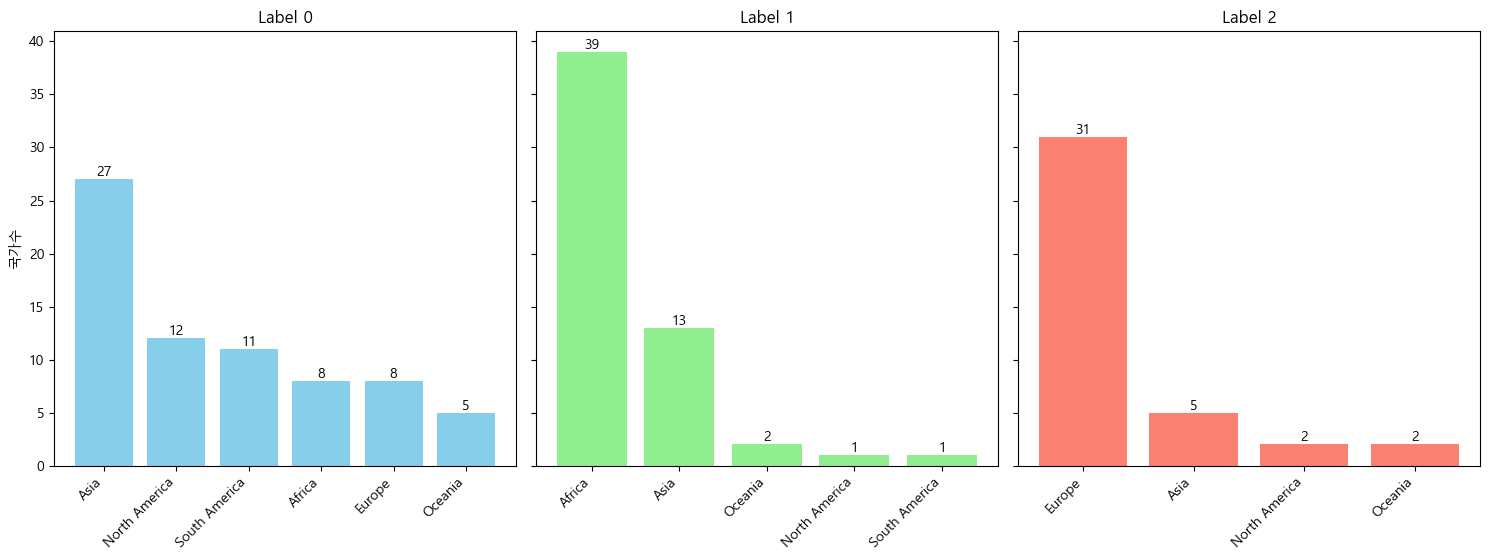

In [28]:
labels = label_df["label"].unique()
label_colors = {0: "skyblue", 1: "lightgreen", 2: "salmon"}
label_dfs = [label_df[label_df["label"] == lbl] for lbl in labels]

fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)

for i, (lbl, ax) in enumerate(zip(labels, axes)):
    sub_df = label_dfs[i]
    bars = ax.bar(sub_df["continent"], sub_df["counts"], color=label_colors[lbl])

    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f"{height}", 
                ha="center", va="bottom", fontsize=10)

    ax.set_title(f"Label {lbl}")
    ax.set_xticks(range(len(sub_df["continent"])))  
    ax.set_xticklabels(sub_df["continent"], rotation=45, ha="right")

    if i == 0:
        ax.set_ylabel("국가수")
    else:
        ax.set_ylabel("")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

C:\Users\ysh10\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


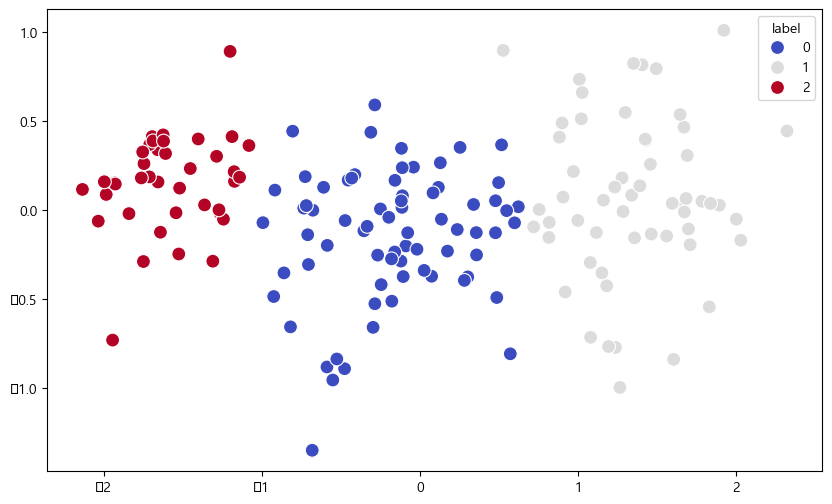

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(filtered_df[["pre_child_mort", "pre_health", "pre_life_expec"]])

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue="label", data=filtered_df, palette="coolwarm", s=100)
plt.show()

### **유아 사망률 분포**

C:\Users\ysh10\AppData\Local\Temp\ipykernel_1556\466295535.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


<AxesSubplot: xlabel='label', ylabel='child_mort'>

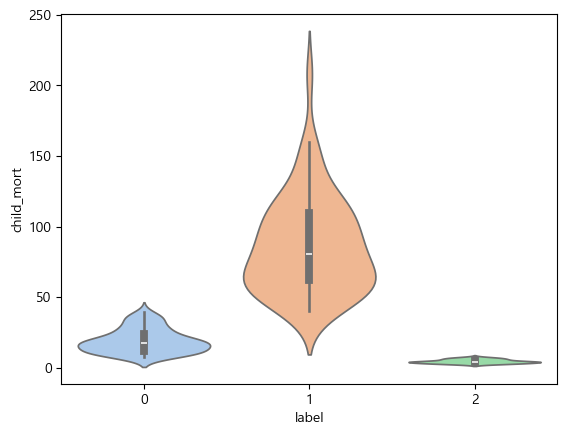

In [30]:
sns.violinplot(
    data=filtered_df,
    x="label",
    y="child_mort",
    palette="pastel"
)

C:\Users\ysh10\AppData\Local\Temp\ipykernel_1556\4224306891.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


<AxesSubplot: xlabel='label', ylabel='pre_child_mort'>

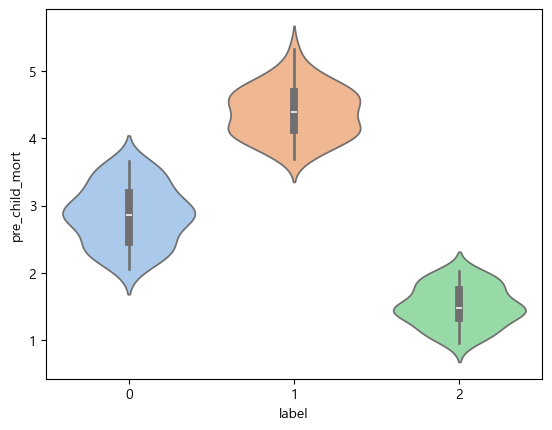

In [31]:
sns.violinplot(
    data=filtered_df,
    x="label",
    y="pre_child_mort",
    palette="pastel"
)

### **건강 관련 지출 비용 분포**

C:\Users\ysh10\AppData\Local\Temp\ipykernel_1556\3877125919.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


<AxesSubplot: xlabel='label', ylabel='health'>

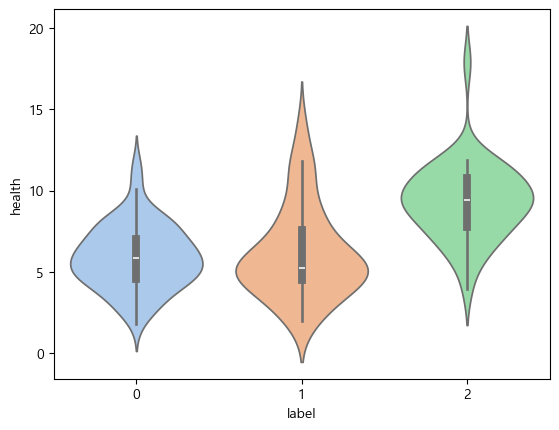

In [32]:
sns.violinplot(
    data=filtered_df,
    x="label",
    y="health",
    palette="pastel"
)

C:\Users\ysh10\AppData\Local\Temp\ipykernel_1556\3902453721.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


<AxesSubplot: xlabel='label', ylabel='pre_health'>

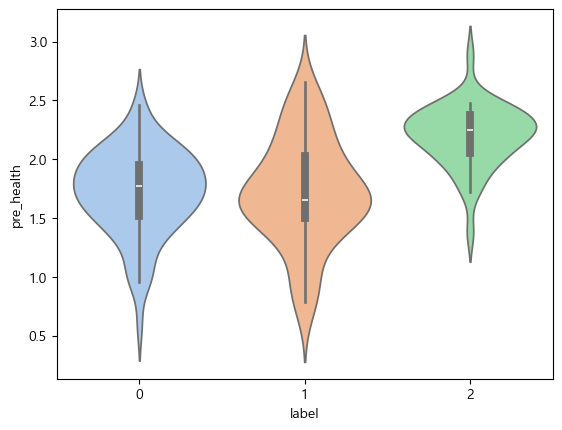

In [33]:
sns.violinplot(
    data=filtered_df,
    x="label",
    y="pre_health",
    palette="pastel"
)

In [34]:
group_0 = filtered_df[filtered_df["label"] == 0]["pre_health"]
group_1 = filtered_df[filtered_df["label"] == 1]["pre_health"]

statistic, p_value = stats.levene(group_0, group_1)

if p_value > 0.05:
    print("등분산 가정 만족")
else:
    print("이분산 가정 만족")

등분산 가정 만족


In [35]:
statistic, p_value = stats.ttest_ind(
            a=group_0,
            b=group_1,
            alternative="two-sided", # 두 그룹의 평균이 같다.
            equal_var=True
        )

print(f"group_0 & group_1: p-value = {p_value}") # 귀무가설 채택(두 그룹의 평균은 같다.)

group_0 & group_1: p-value = 0.979975061973716


In [49]:
group_0 = filtered_df[filtered_df["label"] == 0]["health"]
group_1 = filtered_df[filtered_df["label"] == 1]["health"]

statistic, p_value = stats.levene(group_0, group_1)

if p_value > 0.05:
    print("등분산 가정 만족")
else:
    print("이분산 가정 만족")

등분산 가정 만족


In [50]:
statistic, p_value = stats.ttest_ind(
            a=group_0,
            b=group_1,
            alternative="two-sided", # 두 그룹의 평균이 같다.
            equal_var=True
        )

print(f"group_0 & group_1: p-value = {p_value}") # 귀무가설 채택(두 그룹의 평균은 같다.)

group_0 & group_1: p-value = 0.5675570697429528


### **기대 수명 분포**

C:\Users\ysh10\AppData\Local\Temp\ipykernel_1556\1029765005.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


<AxesSubplot: xlabel='label', ylabel='life_expec'>

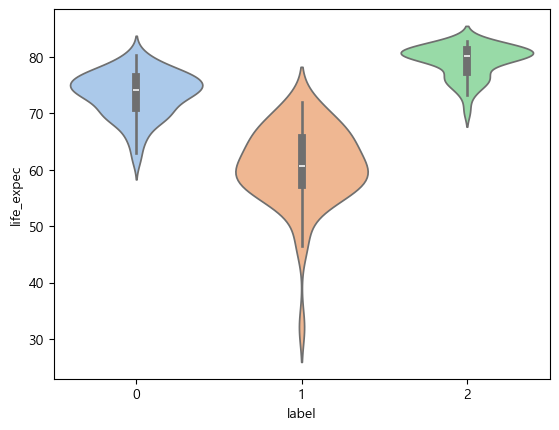

In [36]:
sns.violinplot(
    data=filtered_df,
    x="label",
    y="life_expec",
    palette="pastel"
)

C:\Users\ysh10\AppData\Local\Temp\ipykernel_1556\2326876935.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


<AxesSubplot: xlabel='label', ylabel='pre_life_expec'>

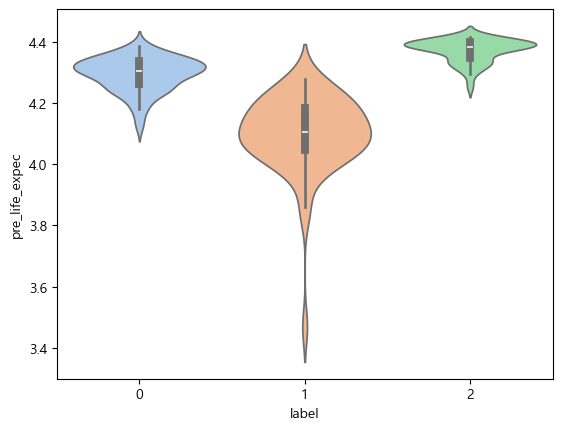

In [37]:
sns.violinplot(
    data=filtered_df, 
    x="label",
    y="pre_life_expec",
    palette="pastel"
)

In [38]:
group_0 = filtered_df[filtered_df["label"] == 0]["pre_life_expec"]
group_2 = filtered_df[filtered_df["label"] == 2]["pre_life_expec"]

statistic, p_value = stats.levene(group_0, group_2)

if p_value > 0.05:
    print("등분산 가정 만족")
else:
    print("이분산 가정 만족")

이분산 가정 만족


In [39]:
statistic, p_value = stats.ttest_ind(
            a=group_0,
            b=group_2,
            alternative="two-sided", # 두 그룹의 평균이 같다.
            equal_var=False
        )

print(f"group_0 & group_2: p-value = {p_value}") # 귀무가설 기각(두 그룹의 평균은 같지 않다.)

group_0 & group_2: p-value = 1.9947766859420485e-14


In [51]:
group_0 = filtered_df[filtered_df["label"] == 0]["life_expec"]
group_2 = filtered_df[filtered_df["label"] == 2]["life_expec"]

statistic, p_value = stats.levene(group_0, group_2)

if p_value > 0.05:
    print("등분산 가정 만족")
else:
    print("이분산 가정 만족")

이분산 가정 만족


In [52]:
statistic, p_value = stats.ttest_ind(
            a=group_0,
            b=group_2,
            alternative="two-sided", # 두 그룹의 평균이 같다.
            equal_var=False
        )

print(f"group_0 & group_2: p-value = {p_value}") # 귀무가설 기각(두 그룹의 평균은 같지 않다.)

group_0 & group_2: p-value = 1.213993041393825e-14


### **label0**

In [40]:
label_0_df = filtered_df[filtered_df["label"] == 0][["continent", "region_1"]].value_counts().reset_index(name="counts")
label_0_df.sort_values(by="continent", ascending=True)

,continent,region_1,counts
4,Africa,Northern Africa,5
10,Africa,Eastern Africa,2
14,Africa,Western Africa,1
0,Asia,Western Asia,13
3,Asia,South-eastern Asia,6
7,Asia,Central Asia,3
8,Asia,Southern Asia,3
11,Asia,Eastern Asia,2
5,Europe,Eastern Europe,5
12,Europe,Southern Europe,2


In [41]:
filtered_df[filtered_df["label"] == 0]

,country,child_mort,health,life_expec,region_1,region_2,continent,pre_child_mort,pre_health,pre_life_expec,label
1,Albania,16.6,6.55,76.3,Southern Europe,NaN,Europe,2.809403,1.879465,4.334673,0
2,Algeria,27.3,4.17,76.5,Northern Africa,NaN,Africa,3.306887,1.427916,4.337291,0
4,Antigua and Barbuda,10.3,6.03,76.8,Caribbean,Latin America and the Caribbean,North America,2.332144,1.796747,4.341205,0
5,Argentina,14.5,8.10,75.8,South America,Latin America and the Caribbean,South America,2.674149,2.091864,4.328098,0
6,Armenia,18.1,4.40,73.3,Western Asia,NaN,Asia,2.895912,1.481605,4.294561,0
...,...,...,...,...,...,...,...,...,...,...,...
160,Uruguay,10.6,8.35,76.4,South America,Latin America and the Caribbean,South America,2.360854,2.122262,4.335983,0
161,Uzbekistan,36.3,5.81,68.8,Central Asia,NaN,Asia,3.591818,1.759581,4.231204,0
162,Vanuatu,29.2,5.25,63.0,Melanesia,NaN,Oceania,3.374169,1.658228,4.143135,0
163,Venezuela,17.1,4.91,75.4,South America,Latin America and the Caribbean,South America,2.839078,1.591274,4.322807,0


In [42]:
filtered_df[filtered_df["label"] == 0]["country"].unique()

array(['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Barbados',
       'Belize', 'Brazil', 'Brunei', 'Bulgaria', 'Cape Verde', 'Chile',
       'China', 'Colombia', 'Costa Rica', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Fiji', 'Georgia', 'Grenada', 'Guatemala',
       'Guyana', 'Indonesia', 'Iran', 'Iraq', 'Jamaica', 'Jordan',
       'Kazakhstan', 'Kuwait', 'Kyrgyz Republic', 'Latvia', 'Lebanon',
       'Libya', 'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritius',
       'Moldova', 'Mongolia', 'Morocco', 'Oman', 'Panama', 'Paraguay',
       'Peru', 'Philippines', 'Qatar', 'Romania', 'Russia', 'Samoa',
       'Saudi Arabia', 'Seychelles', 'Solomon Islands', 'Sri Lanka',
       'St. Vincent and the Grenadines', 'Suriname', 'Thailand', 'Tonga',
       'Tunisia', 'Turkey', 'Ukraine', 'United Arab Emirates', 'Uruguay',
       'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam'], dtype=object)

### **label1**

In [43]:
label_1_df = filtered_df[filtered_df["label"] == 1][["continent", "region_1"]].value_counts().reset_index(name="counts")
label_1_df.sort_values(by="continent", ascending=True)

,continent,region_1,counts
0,Africa,Western Africa,15
1,Africa,Eastern Africa,11
2,Africa,Middle Africa,8
4,Africa,Southern Africa,4
8,Africa,Northern Africa,1
3,Asia,Southern Asia,6
5,Asia,South-eastern Asia,4
6,Asia,Central Asia,2
9,Asia,Western Asia,1
10,North America,Caribbean,1


In [44]:
filtered_df[filtered_df["label"] == 1]

,country,child_mort,health,life_expec,region_1,region_2,continent,pre_child_mort,pre_health,pre_life_expec,label
0,Afghanistan,90.2,7.58,56.2,Southern Asia,NaN,Asia,4.502029,2.025513,4.028917,1
3,Angola,119.0,2.85,60.1,Middle Africa,Sub-Saharan Africa,Africa,4.779123,1.047319,4.096010,1
12,Bangladesh,49.4,3.52,70.4,Southern Asia,NaN,Asia,3.899950,1.258461,4.254193,1
17,Benin,111.0,4.10,61.8,Western Africa,Sub-Saharan Africa,Africa,4.709530,1.410987,4.123903,1
18,Bhutan,42.7,5.20,72.1,Southern Asia,NaN,Asia,3.754199,1.648659,4.278054,1
19,Bolivia,46.6,4.84,71.6,South America,Latin America and the Caribbean,South America,3.841601,1.576915,4.271095,1
21,Botswana,52.5,8.30,57.1,Southern Africa,Sub-Saharan Africa,Africa,3.960813,2.116256,4.044804,1
25,Burkina Faso,116.0,6.74,57.9,Western Africa,Sub-Saharan Africa,Africa,4.753590,1.908060,4.058717,1
26,Burundi,93.6,11.60,57.7,Eastern Africa,Sub-Saharan Africa,Africa,4.539030,2.451005,4.055257,1
27,Cambodia,44.4,5.68,66.1,South-eastern Asia,NaN,Asia,3.793239,1.736951,4.191169,1


In [45]:
filtered_df[filtered_df["label"] == 1]["country"].unique()

array(['Afghanistan', 'Angola', 'Bangladesh', 'Benin', 'Bhutan',
       'Bolivia', 'Botswana', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire",
       'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana',
       'Guinea', 'Guinea-Bissau', 'Haiti', 'India', 'Kenya', 'Kiribati',
       'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali',
       'Mauritania', 'Micronesia, Fed. Sts.', 'Mozambique', 'Myanmar',
       'Namibia', 'Nepal', 'Niger', 'Nigeria', 'Pakistan', 'Rwanda',
       'Senegal', 'Sierra Leone', 'South Africa', 'Sudan', 'Tajikistan',
       'Tanzania', 'Timor-Leste', 'Togo', 'Turkmenistan', 'Uganda',
       'Yemen', 'Zambia'], dtype=object)

### **label2**

In [46]:
label_2_df = filtered_df[filtered_df["label"] == 2][["continent", "region_1"]].value_counts().reset_index(name="counts")
label_2_df.sort_values(by="continent", ascending=True)

,continent,region_1,counts
4,Asia,Eastern Asia,2
5,Asia,Western Asia,2
8,Asia,South-eastern Asia,1
0,Europe,Southern Europe,10
1,Europe,Northern Europe,9
2,Europe,Western Europe,7
3,Europe,Eastern Europe,5
6,North America,Northern America,2
7,Oceania,Australia and New Zealand,2


In [47]:
filtered_df[filtered_df["label"] == 2]

,country,child_mort,health,life_expec,region_1,region_2,continent,pre_child_mort,pre_health,pre_life_expec,label
7,Australia,4.8,8.73,82.0,Australia and New Zealand,NaN,Oceania,1.568616,2.166765,4.406719,2
8,Austria,4.3,11.00,80.5,Western Europe,NaN,Europe,1.458615,2.397895,4.388257,2
14,Belarus,5.5,5.61,70.4,Eastern Europe,NaN,Europe,1.704748,1.724551,4.254193,2
15,Belgium,4.5,10.70,80.0,Western Europe,NaN,Europe,1.504077,2.370244,4.382027,2
20,Bosnia and Herzegovina,6.9,11.10,76.8,Southern Europe,NaN,Europe,1.931521,2.406945,4.341205,2
29,Canada,5.6,11.30,81.3,Northern America,NaN,North America,1.722767,2.424803,4.398146,2
41,Croatia,5.5,7.76,76.3,Southern Europe,NaN,Europe,1.704748,2.048982,4.334673,2
42,Cyprus,3.6,5.97,79.9,Western Asia,NaN,Asia,1.280934,1.786747,4.380776,2
43,Czech Republic,3.4,7.88,77.5,Eastern Europe,NaN,Europe,1.223775,2.064328,4.350278,2
44,Denmark,4.1,11.40,79.5,Northern Europe,NaN,Europe,1.410987,2.433613,4.375757,2


In [48]:
filtered_df[filtered_df["label"] == 2]["country"].unique()

array(['Australia', 'Austria', 'Belarus', 'Belgium',
       'Bosnia and Herzegovina', 'Canada', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France',
       'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel',
       'Italy', 'Japan', 'Lithuania', 'Luxembourg', 'Malta', 'Montenegro',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'Serbia', 'Singapore', 'Slovak Republic', 'Slovenia',
       'South Korea', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom',
       'United States'], dtype=object)